In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from prophet import Prophet

In [50]:
df = pd.read_csv("Daily_running_shoes.csv", index_col = "date")

In [51]:
test_size = 30
split_point = int(df.shape[0]-test_size)

In [52]:
df_train = df.iloc[0:split_point,:]
df_test = df.iloc[split_point:df.shape[0],:]

In [53]:
df_train.head()

,quantity
date,
2019-06-01,136
2019-06-02,5
2019-06-03,30
2019-06-04,2146
2019-06-05,2066


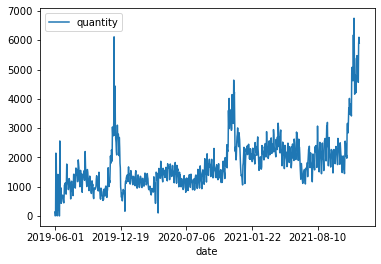

In [54]:
df_train.plot();

In [55]:
df_prophet = df_train.reset_index(drop=False)

In [56]:
df_prophet.columns = ["ds", "y"]

In [57]:
df_prophet.head(5)

,ds,y
0,2019-06-01,136
1,2019-06-02,5
2,2019-06-03,30
3,2019-06-04,2146
4,2019-06-05,2066


In [58]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = model.make_future_dataframe(periods=30, include_history=True)
future

,ds
0,2019-06-01
1,2019-06-02
2,2019-06-03
3,2019-06-04
4,2019-06-05
...,...
952,2022-01-09
953,2022-01-10
954,2022-01-11
955,2022-01-12


In [60]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-01,1336.692433,529.773173,1514.342671,1336.692433,1336.692433,-301.271460,-301.271460,-301.271460,-311.609438,-311.609438,-311.609438,10.337977,10.337977,10.337977,0.0,0.0,0.0,1035.420973
1,2019-06-02,1337.543048,972.180736,1961.627755,1337.543048,1337.543048,136.302151,136.302151,136.302151,144.030298,144.030298,144.030298,-7.728148,-7.728148,-7.728148,0.0,0.0,0.0,1473.845199
2,2019-06-03,1338.393664,1061.486780,2032.213397,1338.393664,1338.393664,222.920274,222.920274,222.920274,251.081755,251.081755,251.081755,-28.161480,-28.161480,-28.161480,0.0,0.0,0.0,1561.313938
3,2019-06-04,1339.244279,884.686424,1850.562719,1339.244279,1339.244279,48.122997,48.122997,48.122997,98.933976,98.933976,98.933976,-50.810979,-50.810979,-50.810979,0.0,0.0,0.0,1387.367276
4,2019-06-05,1340.094894,826.704038,1788.025020,1340.094894,1340.094894,-47.033681,-47.033681,-47.033681,28.451193,28.451193,28.451193,-75.484874,-75.484874,-75.484874,0.0,0.0,0.0,1293.061213


In [71]:
test = pd.concat([forecast, df_prophet["y"]], axis=1)

In [42]:
df_prophet.ds.to_timestamp()

TypeError: unsupported Type Index

In [38]:
Timestamp(df_temp.index[0])

NameError: name 'Timestamp' is not defined

In [16]:
df_train.head()

,quantity
date,
2019-06-01,136
2019-06-02,5
2019-06-03,30
2019-06-04,2146
2019-06-05,2066


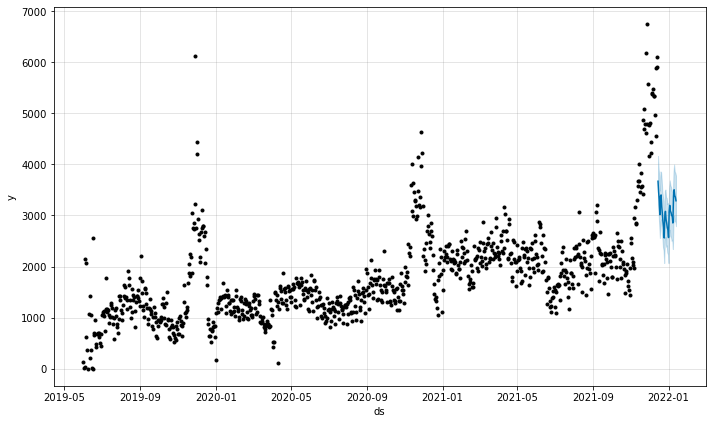

In [13]:
fig1 = model.plot(forecast)

Plotting the data using same format I had for ARIMA

In [14]:
# Forecast
Forecast = pd.Series(forecast.yhat.values, index=df_test.index)
lower_series = pd.Series(forecast.yhat_lower.values, index=df_test.index)
upper_series = pd.Series(forecast.yhat_upper.values, index=df_test.index)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

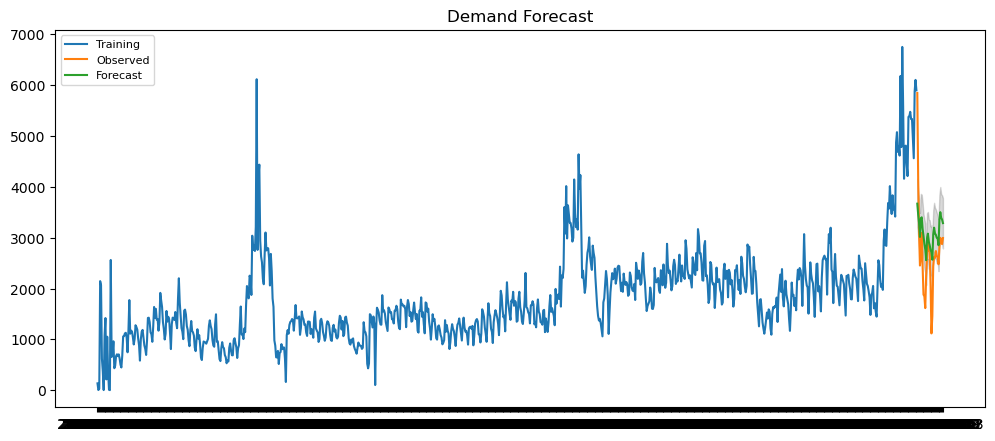

In [15]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='Training')
plt.plot(df_test, label='Observed')

plt.plot(Forecast, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Demand Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Much better predictions with Prophet than ARIMA

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(df_test, Forecast)

615.5083501115549